<a href="https://colab.research.google.com/github/Kush-23/BIT-Internship-Group5/blob/main/TimeSeries_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzip the folder containing the dataset

In [2]:
!unzip /content/drive/MyDrive/web-traffic-time-series-forecasting

unzip:  cannot find or open /content/drive/MyDrive/web-traffic-time-series-forecasting, /content/drive/MyDrive/web-traffic-time-series-forecasting.zip or /content/drive/MyDrive/web-traffic-time-series-forecasting.ZIP.


In [3]:
!unzip /content/drive/MyDrive/web-traffic-time-series-forecasting/train_1.csv.zip

Archive:  /content/drive/MyDrive/web-traffic-time-series-forecasting/train_1.csv.zip
  inflating: train_1.csv             


Import required packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from statsmodels.tsa.arima.model import ARIMA

Load the data

In [5]:
df=pd.read_csv("/content/train_1.csv")

Data Cleaning

In [6]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
df.shape
df.dtypes

Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object

In [8]:
missing=df.isnull().sum()
missing
missing.sum()

6192931

In [9]:
df=df.fillna(0)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


Train the model

In [10]:
train_data = pd.melt(df,id_vars=['Page'],var_name='Date',value_name='Visits')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


Plot average number of views per day

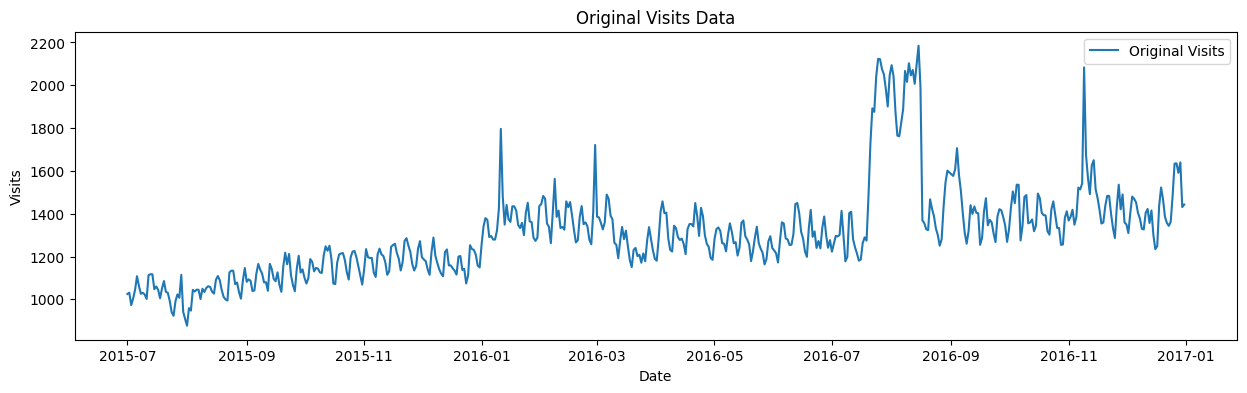

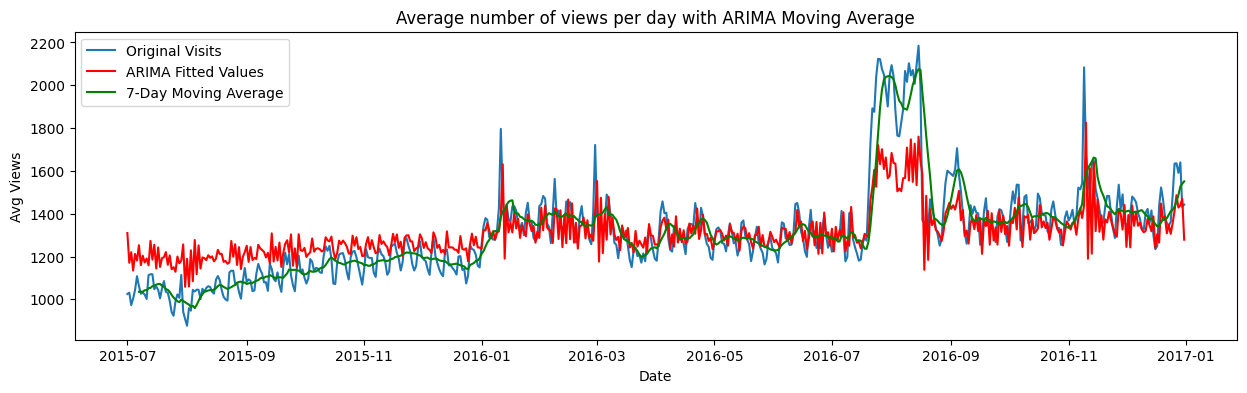

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_data is a DataFrame with 'Date' and 'Visits' columns

# Convert 'Date' to datetime format if it's not already
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Set 'Date' as the index
train_data.set_index('Date', inplace=True)

# Resample data to daily frequency if not already in that format
temp = train_data['Visits'].resample('D').mean()

# Plot the original data
plt.figure(figsize=(15, 4))
plt.plot(temp, label='Original Visits')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title('Original Visits Data')
plt.legend()
plt.show()

# Plotting the Moving Average using ARIMA
plt.figure(figsize=(15, 4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Average number of views per day with ARIMA Moving Average')

# Fit ARIMA model
model = ARIMA(temp, order=(0, 0, 1))  # You can adjust the order as needed
result = model.fit()

# Plot the original data
plt.plot(temp, label='Original Visits')

# Plot the fitted values
plt.plot(result.fittedvalues, color='red', label='ARIMA Fitted Values')

# Plot the moving average
rolling_mean = temp.rolling(window=7).mean()  # You can adjust the window size as needed
plt.plot(rolling_mean, color='green', label='7-Day Moving Average')

plt.legend()
plt.show()

Calculate and plot total number of views per language

In [12]:
#detecting language across page
def detect_language(page):
    text = page.split('.wikipedia')
    if re.search('[a-z][a-z]',text[0][-2:]):
        return text[0][-2:]
    else:
        return 'none'

In [13]:
import re
detect_language("Заглавная_страница_ru.wikipedia.org_all-access...")

'ru'

In [14]:
def lang_code(code):
    if code == 'zh':
        return 'Chinese'
    elif code == 'fr':
        return 'French'
    elif code == 'en':
        return 'English'
    elif code == 'ru':
        return 'Russian'
    elif code == 'de':
        return 'German'
    elif code == 'ja':
        return 'Japanese'
    elif code == 'es':
        return 'Spanish'
    else:
        return 'None'

In [15]:
train_data.head()

,Page,Visits
Date,,
2015-07-01,2NE1_zh.wikipedia.org_all-access_spider,18.0
2015-07-01,2PM_zh.wikipedia.org_all-access_spider,11.0
2015-07-01,3C_zh.wikipedia.org_all-access_spider,1.0
2015-07-01,4minute_zh.wikipedia.org_all-access_spider,35.0
2015-07-01,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0


autocorrelation


In [16]:
def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

df['lang'] = df.Page.map(find_language)

In [17]:
lang_sets = {}
lang_sets['en'] = df[df.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = df[df.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = df[df.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = df[df.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = df[df.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = df[df.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = df[df.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = df[df.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [18]:
days = [r for r in range(sums['en'].shape[0])]

en


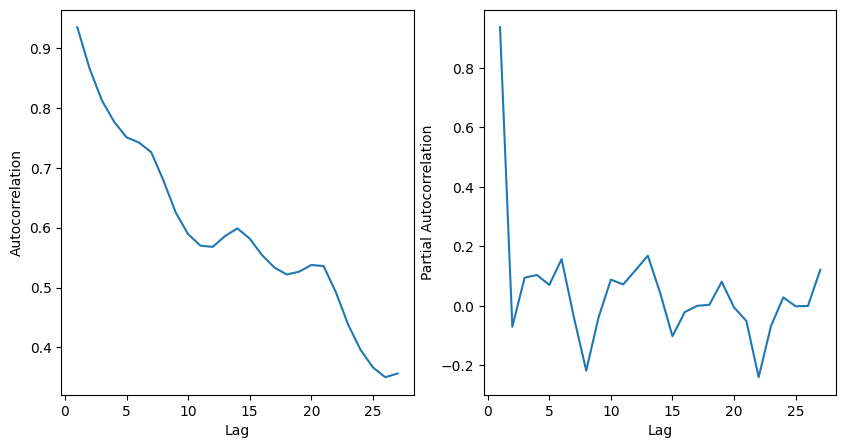

ja


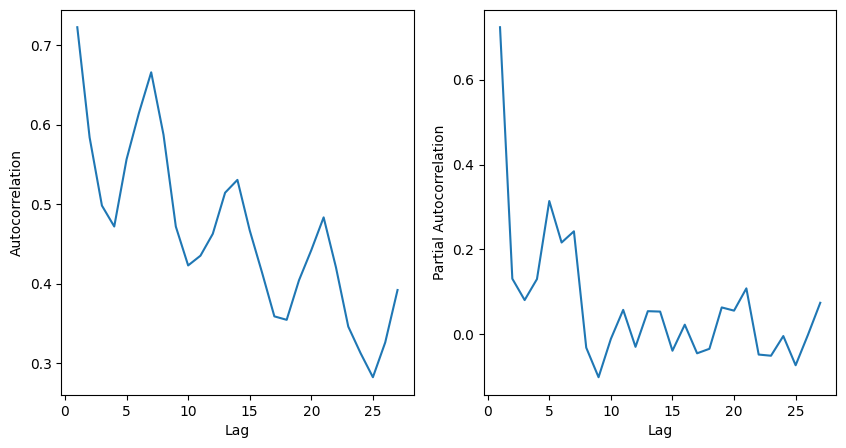

de


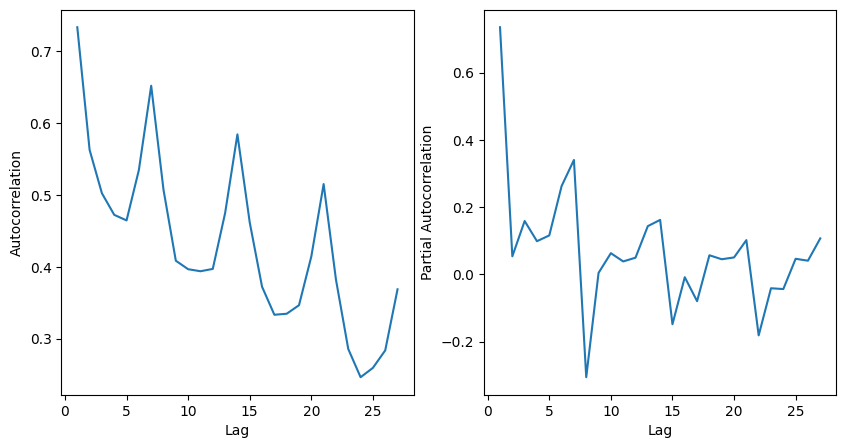

na


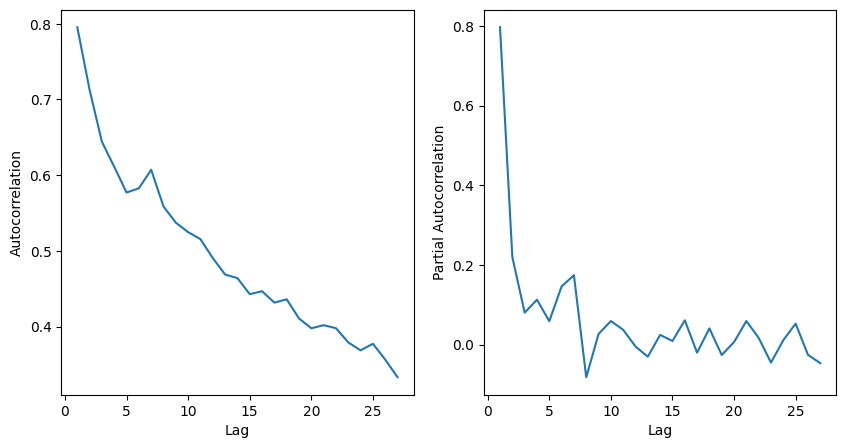

fr


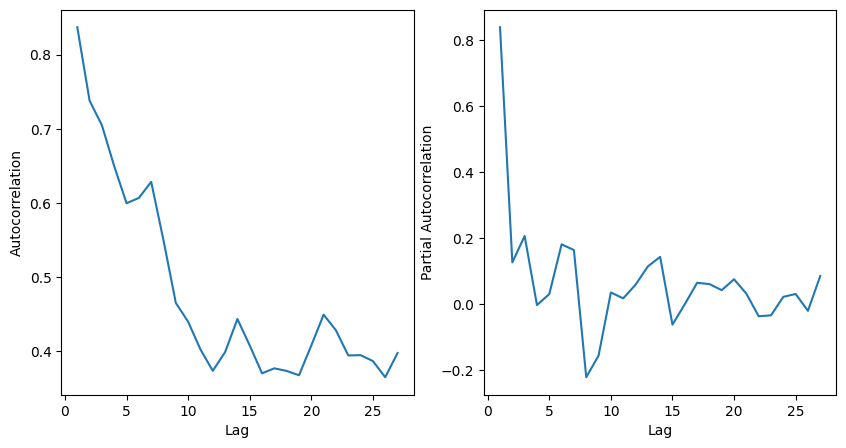

zh


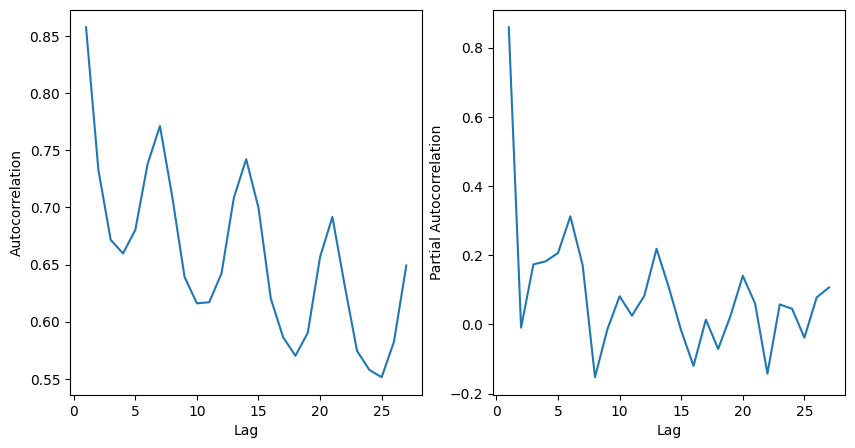

ru


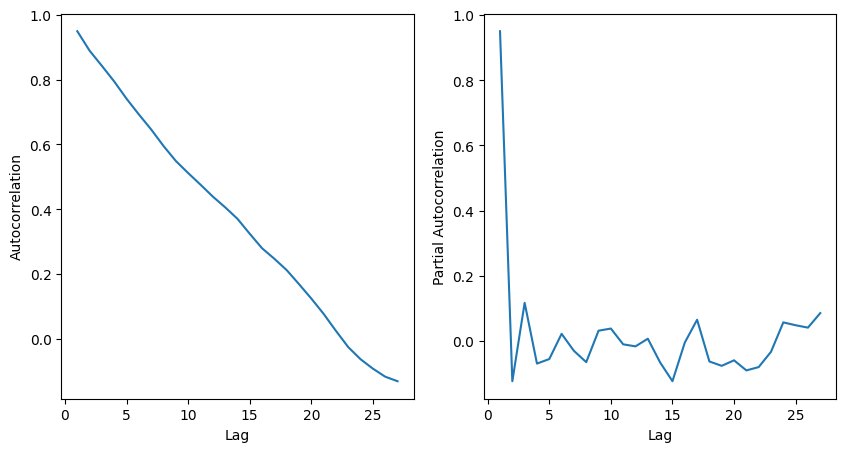

es


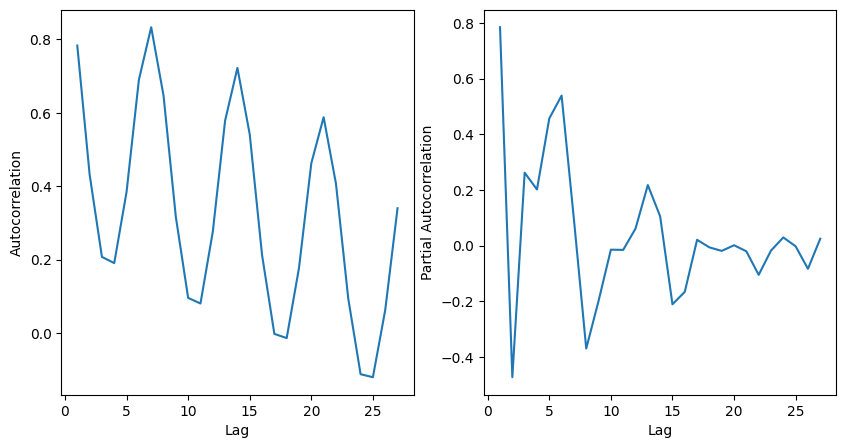

In [19]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in sums:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    data = np.array(sums[key])
    autocorr = acf(data)
    pac = pacf(data)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    print(key)
    plt.show()

Looking at all these graphs we conclude¶
We won't be needing any differencing for en, ru, fr, na (d=0). For the others we need to subtract them once from their predecessor (d=1).
For ja, de, zh, es there is a trend of peaks after 7 days. Thus a lag of 7 might be used and for the rest a lag of 4 should work okay.

ARIMA model training

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


en


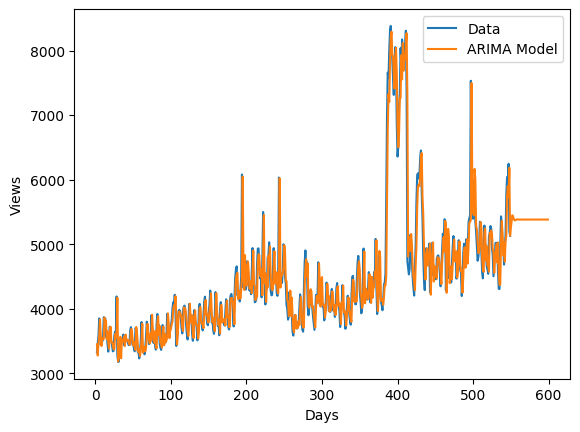

ja


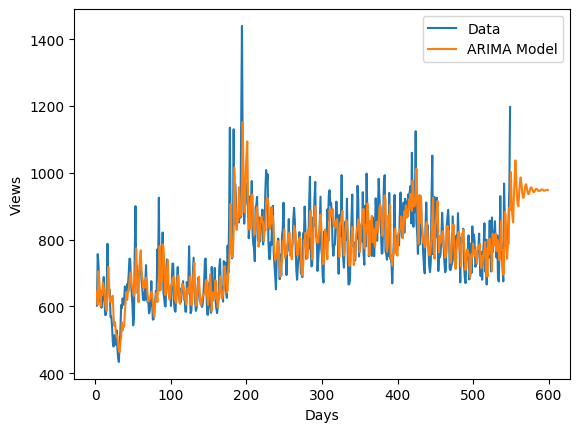

de


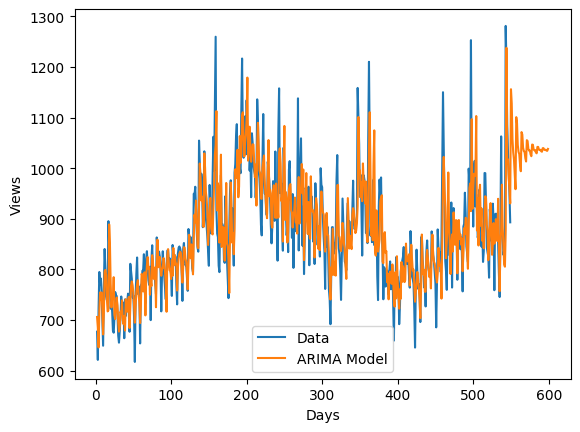

na


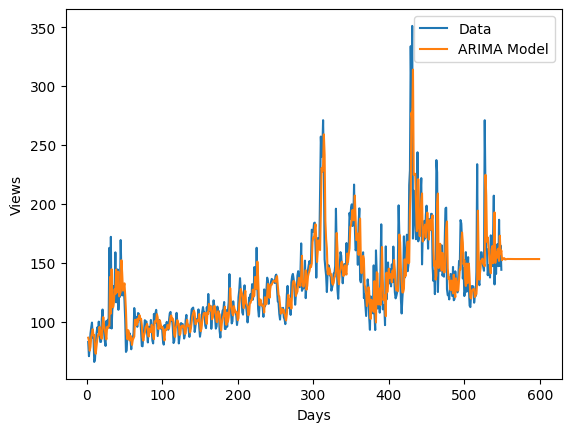

fr


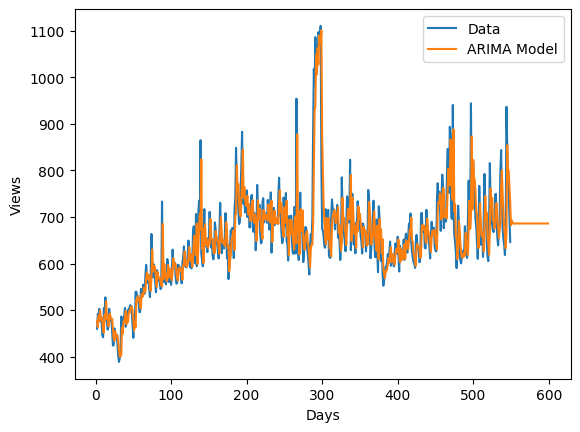

zh


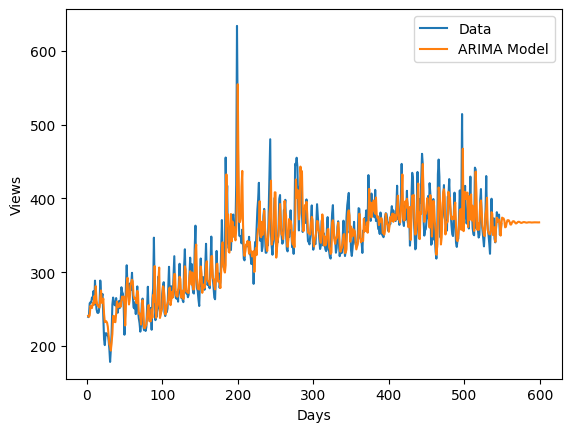

ru


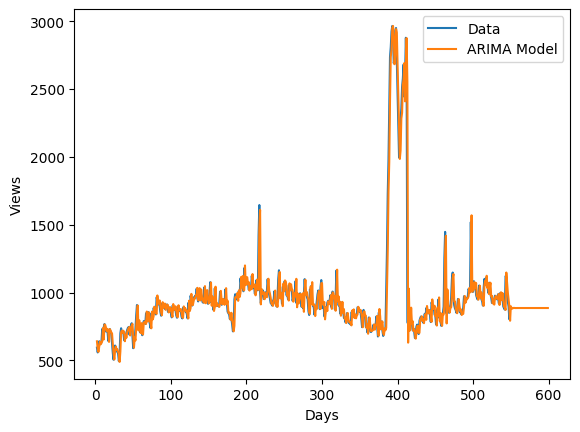

es


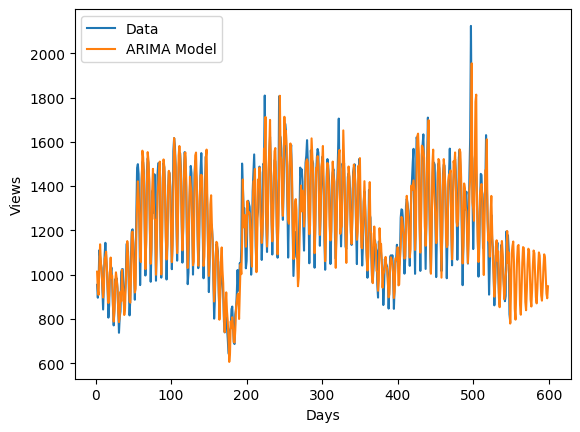

In [20]:
params = {'en': (4,1,0), 'ja': (7,1,1), 'de': (7,1,1), 'na': (4,1,0), 'fr': (4,1,0), 'zh': (7,1,1), 'ru': (4,1,0), 'es': (7,1,1)}

for key in sums:
    data = np.array(sums[key])
    result = None
    arima = ARIMA(data,order=params[key])
    result = arima.fit()
    #print(result.params)
    pred = result.predict(2,599,typ='levels')
    x = [i for i in range(600)]
    i=0

    print(key)
    plt.plot(x[2:len(data)],data[2:] ,label='Data')
    plt.plot(x[2:],pred,label='ARIMA Model')
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_data['Visits'],order=(4,1,0))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
